<a href="https://colab.research.google.com/github/MaxLikhachev/MachineLearningDiplomaWork/blob/example/AudioAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Введение**
Аудиоанализ — область, включающая автоматическое распознавание речи (ASR), цифровую обработку сигналов, а также классификацию, тегирование и генерацию музыки — представляет собой развивающийся поддомен приложений глубокого обучения. Некоторые из самых популярных и распространенных систем машинного обучения, такие как виртуальные помощники Alexa, Siri и Google Home, — это продукты, созданные на основе моделей, извлекающих информацию из аудиосигналов.

# **Обзор аудиофайлов**

Аудио фрагменты представлены в формате .wav. Звуковые волны оцифровываются путем выборки из дискретных интервалов, известных как частота дискретизации (как правило, 44,1 кГц для аудио с CD-качеством, то есть 44 100 семплов в секунду).

Каждый семпл представляет собой амплитуду волны в определенном временном интервале, где глубина в битах (или динамический диапазон сигнала) определяет, насколько детализированным будет семпл (обычно 16 бит, т.е. семпл может варьироваться от 65 536 значений амплитуды).

В обработке сигналов семплинг — это преобразование непрерывного сигнала в серию дискретных значений. Частота дискретизации — это количество семплов за определенный фиксированный промежуток времени. Высокая частота дискретизации приводит к меньшей потере информации, но к большим вычислительным затратам.


Звуковая волна в цифровом формате обозначена красным цветом, а синим — результат семплинга и 4-битного квантования. Справа находится результирующий массив.
Приложения по обработке звука

К ним можно отнести:

Индексирование музыкальных коллекций согласно их аудиопризнакам.
Рекомендация музыки для радиоканалов.
Поиск сходства для аудиофайлов (Shazam).
Обработка и синтез речи — генерирование искусственного голоса для диалоговых агентов.
Обработка аудиоданных с помощью Python

Звук представлен в форме аудиосигнала с такими параметрами, как частота, полоса пропускания, децибел и т.д. Типичный аудиосигнал можно выразить в качестве функции амплитуды и времени.


Время/частота.
Некоторые устройства могут улавливать эти звуки и представлять их в машиночитаемом формате. Примеры этих форматов:

wav (Waveform Audio File)
mp3 (MPEG-1 Audio Layer 3)
WMA (Windows Media Audio)
Процесс обработки звука включает извлечение акустических характеристик, относящихся к поставленной задаче, за которыми следуют схемы принятия решений, которые включают обнаружение, классификацию и объединение знаний. К счастью, некоторые библиотеки Python помогают облегчить эту задачу.

In [1]:
! pip install librosa

In [2]:
import librosa
audio_data = 'vocaroo.mp3'       # https://voca.ro/iMPozIbzB8T
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(94316,) 22050


Этот фрагмент возвращает звуковой временной ряд в качестве массива numpy с частотой дискретизации по умолчанию 22 кГц моно. Это поведение можно изменить с помощью повторного семплинга на частоте 44,1 кГц.

In [3]:
librosa.load(audio_data, sr=44100)

(array([-6.2426478e-03, -6.0658096e-03, -4.9178000e-03, ...,
        -2.3266051e-05, -1.3288871e-05, -4.5128440e-06], dtype=float32), 44100)

Повторный семплинг также можно отключить:

In [4]:
librosa.load(audio_data, sr=None)

(array([-6.4697266e-03, -1.0070801e-03,  5.7983398e-04, ...,
         0.0000000e+00, -3.0517578e-05, -3.0517578e-05], dtype=float32), 11025)

**Проигрывание аудио:**

In [5]:
import IPython.display as ipd
ipd.Audio(audio_data)

**Визуализация аудио** 

График массива аудио:

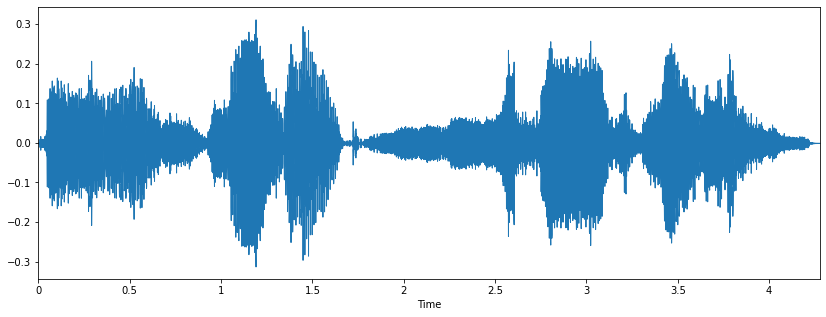

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

**Спектограмма**:

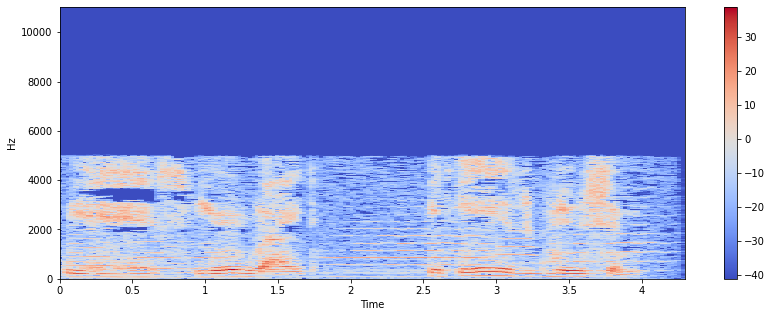

In [7]:
X = librosa.stft(x)   #   преобразует данные в кратковременное преобразование Фурье. 
# С помощью STFT можно определить амплитуду различных частот, воспроизводимых в данный момент времени аудиосигнала
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')  # отображение спектрограммы
plt.colorbar()

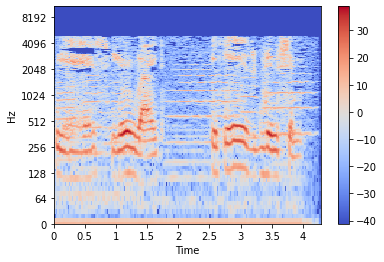

In [8]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log') # преобразование оси частот в логарифмическую
plt.colorbar()

**Создание аудиосигнала:**

In [9]:
import numpy as np
sr = 22050 # частота дискретизации
T = 5.0    # секунды
t = np.linspace(0, T, int(T*sr), endpoint=False) # переменная времени
x = 0.5*np.sin(2*np.pi*220*t) # чистая синусоидная волна при 220 Гц
# проигрывание аудио
ipd.Audio(x, rate=sr) # загрузка массива NumPy
# сохранение аудио
librosa.output.write_wav('tone_220.wav', x, sr)

# **Извлечение признаков из аудио сигнала**
Каждый аудиосигнал состоит из множества признаков.

*Спектральные (частотные)* признаки получаются путем преобразования временного сигнала в частотную область с помощью преобразования Фурье. К ним относятся частота основного тона, частотные компоненты, спектральный центроид, спектральный поток, спектральная плотность, спектральный спад и т.д.

**Спектральный центроид**

Указывает, на какой частоте сосредоточена энергия спектра или, другими словами, указывает, где расположен «центр масс» для звука. Схож со средневзвешенным значением:

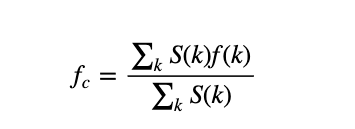

где S(k) — спектральная величина элемента разрешения k, а f(k) — частота элемента k.

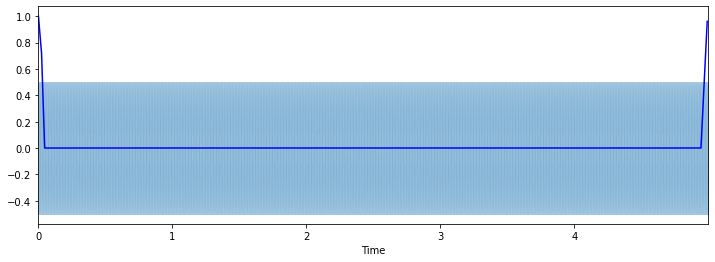

In [10]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

**Спектральный спад**

Это мера формы сигнала, представляющая собой частоту, в которой высокие частоты снижаются до 0. Чтобы получить ее, нужно рассчитать долю элементов в спектре мощности, где 85% ее мощности находится на более низких частотах.

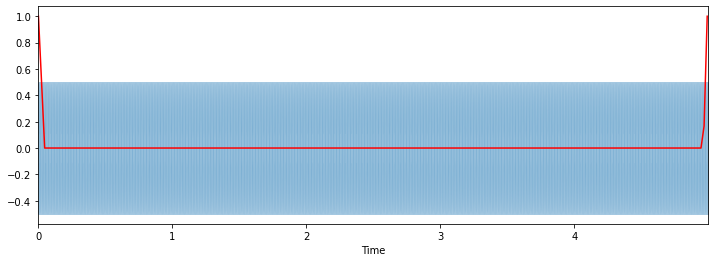

In [11]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

**Спектральная ширина**

Спектральная ширина определяется как ширина полосы света на половине максимальной точки (или полная ширина на половине максимума [FWHM]) и представлена двумя вертикальными красными линиями и λSB на оси длин волн

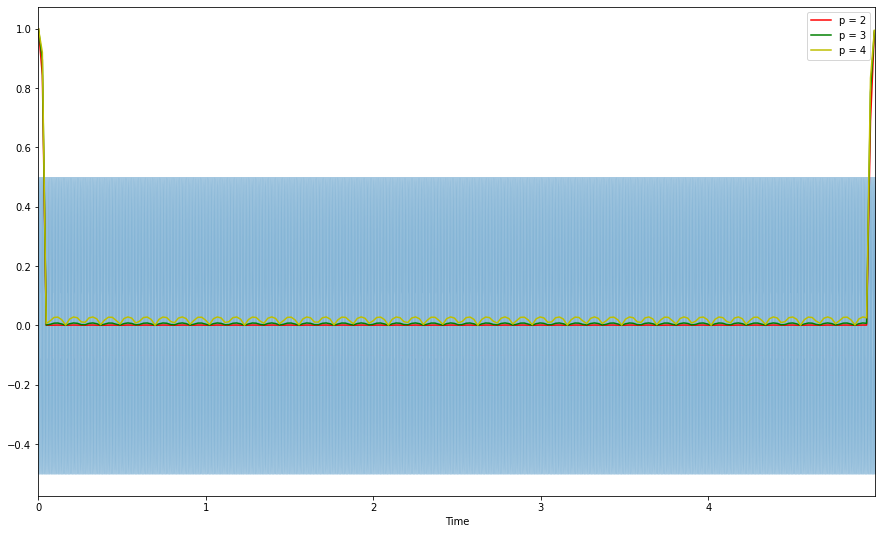

In [12]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

**Скорость пересечения нуля**

Простой способ измерения гладкости сигнала — вычисление числа пересечений нуля в пределах сегмента этого сигнала. Голосовой сигнал колеблется медленно. Например, сигнал 100 Гц будет пересекать ноль 100 раз в секунду, тогда как «немой» фрикативный сигнал может иметь 3000 пересечений нуля в секунду.

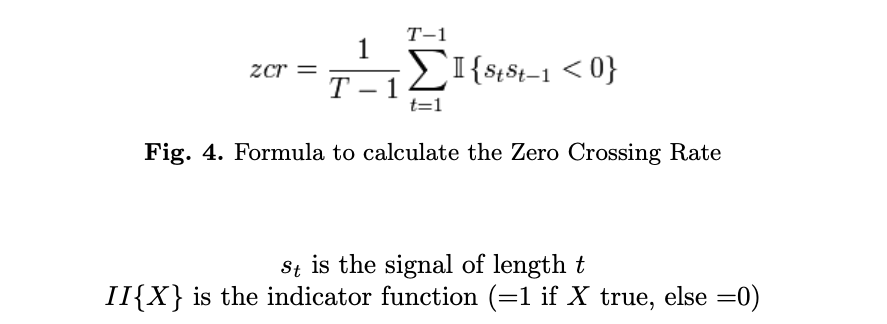
Формула для расчета скорости пересечения нуля, где St — сигнал длины t, II{X} — функция-индикатор (=1 if X true, else =0).
Более высокие значения наблюдаются в таких высоко ударных звуках, как в металле и роке. Теперь визуализируем этот процесс и рассмотрим вычисление скорости пересечения нуля.



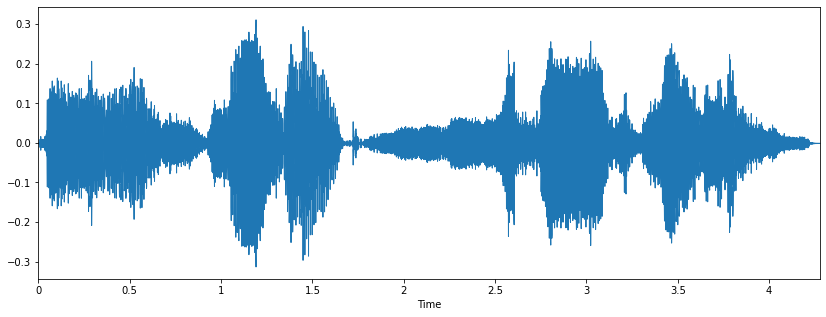

In [13]:
x, sr = librosa.load(audio_data)
# Построение графика сигнала:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

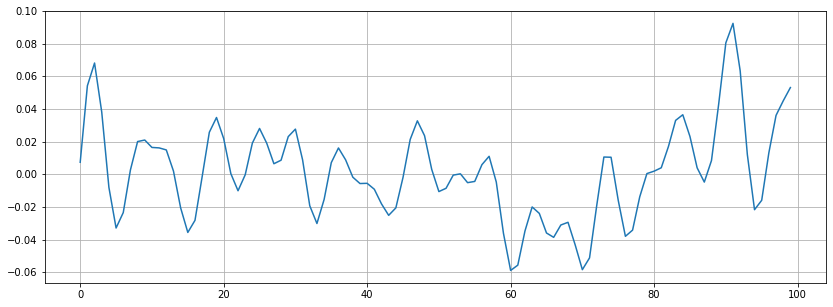

In [14]:
# Увеличение масштаба:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()


In [15]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

22


**Мел-частотные кепстральные коэффициенты (MFCC)**

Представляют собой небольшой набор признаков (обычно около 10–20), которые кратко описывают общую форму спектральной огибающей. Они моделируют характеристики человеческого голоса.

(20, 185)


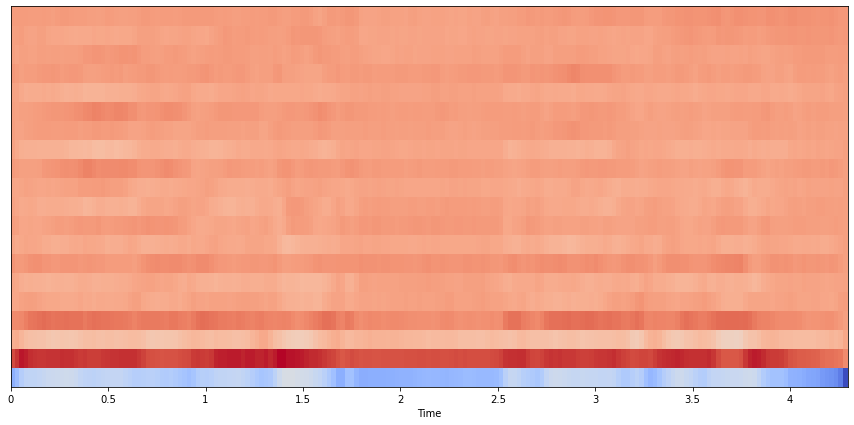

In [16]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
# Отображение MFCC:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

**Цветность**

Признак или вектор цветности обычно представлен вектором признаков из 12 элементов, в котором указано количество энергии каждого высотного класса {C, C#, D, D#, E, …, B} в сигнале. Используется для описания меры сходства между музыкальными произведениями.

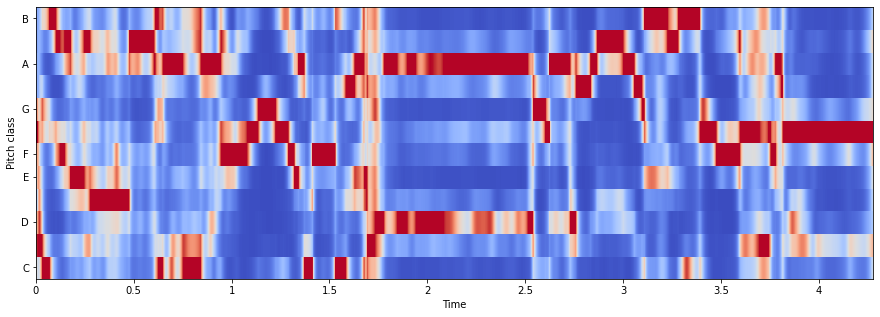

In [17]:
hop_length = 12
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# **Классификация жанров музыки с помощью ANN**

Датасет - http://marsyas.info/downloads/datasets.html

Набор данных состоит из 1000 звуковых треков, длина каждого составляет 30 секунд. Он содержит 10 жанров, каждый из которых представлен 100 треками. Все дорожки — это монофонические 16-битные аудиофайлы 22050 Гц в формате .wav.

**Жанры, представленные в наборе:**

Блюз

Классика

Кантри

Диско

Хип-хоп

Джаз

Метал

Поп

Регги

Рок

In [18]:
# Импортируем все необходимые библиотеки.

import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Конвертируем файлы аудиоданных в PNG или извлекаем спектрограмму для каждого аудио.

cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./drive/My Drive/genres/{g}'):
        songname = f'./drive/My Drive/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 576x576 with 0 Axes>

In [21]:
# Создание заголовка для файла CSV.

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [22]:
# Извлекаем признаки из спектрограммы: MFCC, спектральный центроид, частоту пересечения нуля, частоты цветности и спад спектра.

file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./drive/My Drive/genres/{g}'):
        songname = f'./drive/My Drive/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rmse(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [23]:
# Выполняем предварительную обработку данных, которая включает загрузку данных CSV, создание меток, масштабирование признаков и разбивку данных на наборы для обучения и тестирования.

data = pd.read_csv('dataset.csv')
data.head()

# Удаление ненужных столбцов
data = data.drop(['filename'],axis=1)

# Создание меток
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

# Масштабирование столбцов признаков
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# Создаем модель ANN.

model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Подгоняем модель:

classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 2.2652 - accuracy: 0.1557
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 1.9308 - accuracy: 0.3935
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 1.6753 - accuracy: 0.3942
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 1.4412 - accuracy: 0.5003
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 1.2441 - accuracy: 0.5866
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 1.1377 - accuracy: 0.6170
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 1.0464 - accuracy: 0.6575
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 1.0127 - accuracy: 0.6676
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.9359 - accuracy: 0.7187
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8837 - accuracy: 0.7113
Epoch 11/100
7/7 [===========